In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = np.loadtxt("ex1data2.txt",delimiter=',')
X = np.c_[np.ones(dataset.shape[0]),dataset[:,0:dataset.shape[1]-1]]
y = np.c_[dataset[:,2]]
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [3]:
#Linear hypothesis function
def hypothesis(X,theta): 
    return X.dot(theta)

In [4]:
def cost_fun(X,y,theta):
    h = hypothesis(X,theta)
    m = y.size
    #J = (1/(2*m))*np.sum(np.square((h - y)))
    return (1./(2*m))*(h-y).T.dot(h-y)

In [5]:
def gradient_desc(X, y, alpha,theta,iteration = 1500):
    m = y.size
    J_iter = np.zeros(iteration)
    for it in range(iteration):
        h = hypothesis(X,theta)
        theta = theta - alpha*(1/(m))*(X.T.dot(h-y))
        J_iter[it] = cost_fun(X,y,theta)
    return (theta,J_iter)

In [6]:
theta_initial = np.zeros((X.shape[1],1))
cost_fun(X,y,theta_initial)

array([[0.5]])

## Result

[ 1.          0.88413755 -0.05255038]


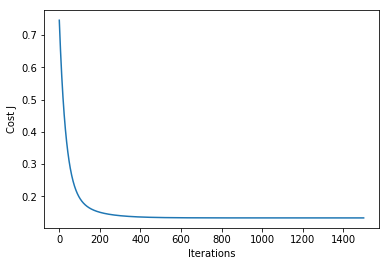

In [7]:
initial_theta = np.ones((X.shape[1],1))
theta,J_history = gradient_desc(X,y,0.01,initial_theta)
t = np.linspace(0,len(J_history),len(J_history))
plt.plot(t,J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
print(theta.ravel())

# Comparison

### Manual Cost Function

In [8]:
manual_pred = hypothesis(X,theta.ravel())
J_manual = (1/(2*(manual_pred.size)))*np.sum(np.square((manual_pred - y)))
np.log(J_manual)

3.706523515681585

In [9]:
score_predicted = 1-((y-manual_pred)**2).sum()/((y-y.mean())**2).sum()
score_predicted

-80.42405100360679

In [10]:
LR = LinearRegression()
model = LR.fit(X,y)
model_predict = model.predict(X)

In [11]:
J_model = (1/(2*(model_predict.size)))*np.sum(np.square((model_predict - y)))
np.log(J_model)

-2.0134478973561323

In [12]:
print(model.coef_)
print(model.score(X,y))

[[ 0.          0.88476599 -0.05317882]]
0.7329450180289143
